In [31]:
import numpy as np
import time
import matplotlib.pyplot as plt
import os

os.chdir("..")
import legacy_code.fast_mfcf_fixed4 as legacy_fast_mfcf

from fast_fast_mfcf import MFCF
from fast_fast_mfcf import mfcf_control


Using fast_fast_mfcf at: /Users/yan/UCL/aste/fast_fast_mfcf/fast_fast_mfcf.py


In [29]:
def get_symmetric_matrix(size):
    random_matrix = np.random.rand(size, size)
    # Make it symmetric by averaging with its transpose
    W = (random_matrix + random_matrix.T) / 2
    return W

def get_time(W, ctl, type="optimised"):
    start = time.time()
    if type == "optimised":
        _ = MFCF().fast_mfcf(W, ctl, "sumsquares")
    else:
        gain_function = legacy_fast_mfcf.sumsquares_gen
        _ = legacy_fast_mfcf.fast_mfcf(W, ctl, gain_function)
    mfcf_time = time.time() - start
    print(f"{type} mfcf took {mfcf_time} seconds")

    return mfcf_time

def run(ctl, optimise_sizes, legacy_sizes):
    optimise_result = []
    legacy_result = []
    i = 0

    while i < len(optimise_sizes):
        size = optimise_sizes[i]
        optimise_mfcf_average = 0
        legacy_mfcf_average = 0
        for _ in range(3):
            W = get_symmetric_matrix(size)
            optimised_mfcf_time = get_time(W.copy(), ctl, type="optimised")
            optimise_mfcf_average += optimised_mfcf_time

            if i < len(legacy_sizes):
                legacy_mfcf_time = get_time(W.copy(), ctl, type="legacy")
                legacy_mfcf_average += legacy_mfcf_time

        optimise_mfcf_average /= 3
        optimise_result.append([size, optimise_mfcf_average])
        print(f"Optimised Size {size} done with average: {optimise_mfcf_average}")

        if i < len(legacy_sizes):
            legacy_mfcf_average /= 3
            legacy_result.append([size, legacy_mfcf_average])
            print(f"Legacy Size {size} done with average: {legacy_mfcf_average}")
        i += 1
    return legacy_result, optimise_result

In [26]:
def plot(result, title, log=False):
    legacy_result = np.array(result[0])
    optimise_result =  np.array(result[1])
    plt.plot(legacy_result[:, 0], legacy_result[:, 1], label='Legacy Version')
    plt.plot(optimise_result[:, 0], optimise_result[:, 1], label='Optimised Version')
    plt.title(title)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.xlabel('Number of vertices')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Compare TMFG generation speed

In [8]:
ctl = mfcf_control()
ctl['threshold'] = 0.00
ctl['drop_sep'] = True
ctl['min_clique_size'] = 4
ctl['max_clique_size'] = 4
ctl['method'] = 'TMFG'

legacy_sizes = [i * 10 for i in range(1, 21)]
optimise_sizes = [i * 10 for i in range(1, 20)] + [i * 100 for i in range(2, 51)]
result = run(ctl, optimise_sizes, legacy_sizes)

optimised mfcf took 0.004535198211669922 seconds
legacy mfcf took 0.0032639503479003906 seconds
optimised mfcf took 0.0033299922943115234 seconds
legacy mfcf took 0.0019538402557373047 seconds
optimised mfcf took 0.0021009445190429688 seconds
legacy mfcf took 0.0013310909271240234 seconds
Optimised Size 10 done with average: 0.003322045008341471
Legacy Size 10 done with average: 0.0021829605102539062
optimised mfcf took 0.003464221954345703 seconds
legacy mfcf took 0.0060999393463134766 seconds
optimised mfcf took 0.0024700164794921875 seconds
legacy mfcf took 0.005477190017700195 seconds
optimised mfcf took 0.002579212188720703 seconds
legacy mfcf took 0.005264997482299805 seconds
Optimised Size 20 done with average: 0.0028378168741861978
Legacy Size 20 done with average: 0.005614042282104492
optimised mfcf took 0.004010915756225586 seconds
legacy mfcf took 0.013521194458007812 seconds
optimised mfcf took 0.003557920455932617 seconds
legacy mfcf took 0.013091802597045898 seconds
optim

#### Normal scale

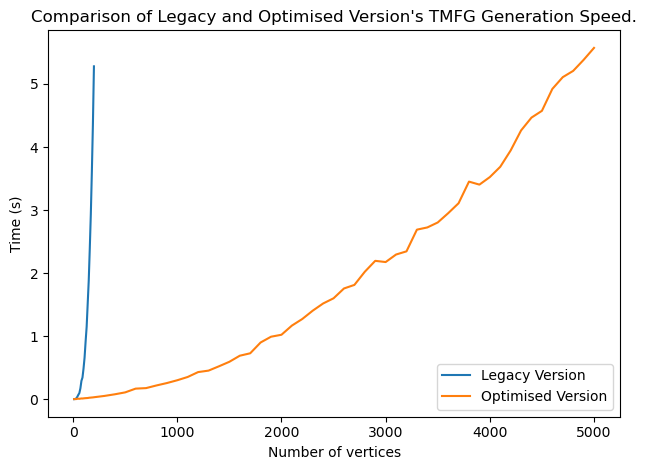

In [9]:
plot(result, "Comparison of Legacy and Optimised Version's TMFG Generation Speed.")

#### Log scale

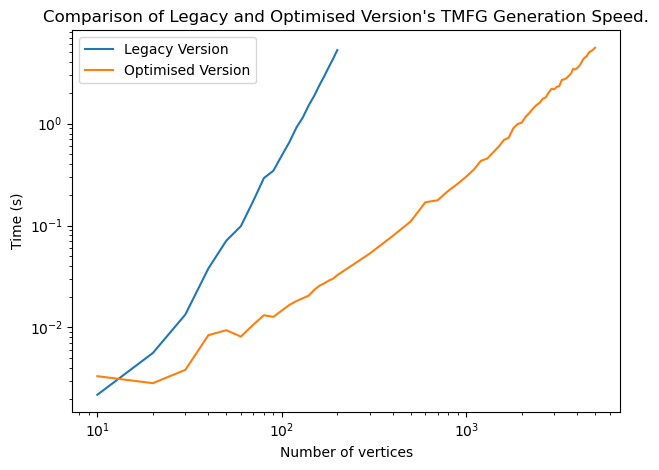

In [10]:
plot(result, "Comparison of Legacy and Optimised Version's TMFG Generation Speed.", log=True)

### Compare MFCF(4, 15) generation speed

In [33]:
ctl = mfcf_control()
ctl['threshold'] = 0.00
ctl['drop_sep'] = False
ctl['min_clique_size'] = 4
ctl['max_clique_size'] = 15
ctl['coordination_number'] = np.inf
ctl['method'] = 'MFCF'

legacy_sizes = [i * 10 for i in range(1, 21)]
optimise_sizes = [i * 10 for i in range(1, 20)] + [i * 100 for i in range(2, 31)]
result = run(ctl, optimise_sizes, legacy_sizes)

optimised mfcf took 0.005726814270019531 seconds
legacy mfcf took 0.0027670860290527344 seconds
optimised mfcf took 0.0019402503967285156 seconds
legacy mfcf took 0.0016238689422607422 seconds
optimised mfcf took 0.0028600692749023438 seconds
legacy mfcf took 0.0012328624725341797 seconds
Optimised Size 10 done with average: 0.003509044647216797
Legacy Size 10 done with average: 0.0018746058146158855
optimised mfcf took 0.01120901107788086 seconds
legacy mfcf took 0.008987903594970703 seconds
optimised mfcf took 0.00802469253540039 seconds
legacy mfcf took 0.01015472412109375 seconds
optimised mfcf took 0.002840280532836914 seconds
legacy mfcf took 0.008126020431518555 seconds
Optimised Size 20 done with average: 0.007357994715372722
Legacy Size 20 done with average: 0.00908954938252767
optimised mfcf took 0.01445627212524414 seconds
legacy mfcf took 0.037333011627197266 seconds
optimised mfcf took 0.023240089416503906 seconds
legacy mfcf took 0.031233787536621094 seconds
optimised mfc

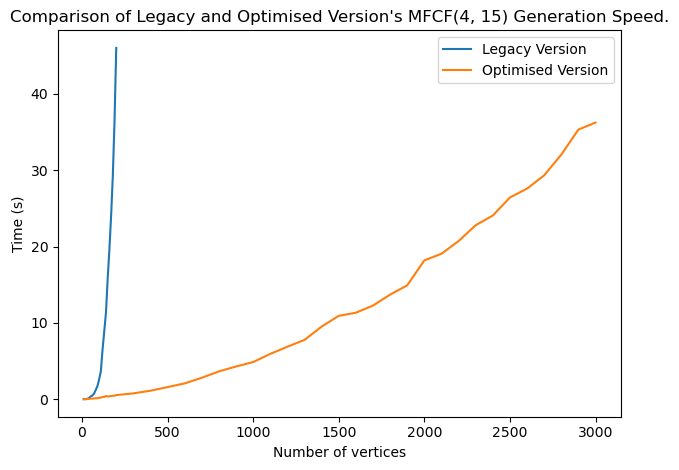

In [34]:
plot(result, "Comparison of Legacy and Optimised Version's MFCF(4, 15) Generation Speed.")

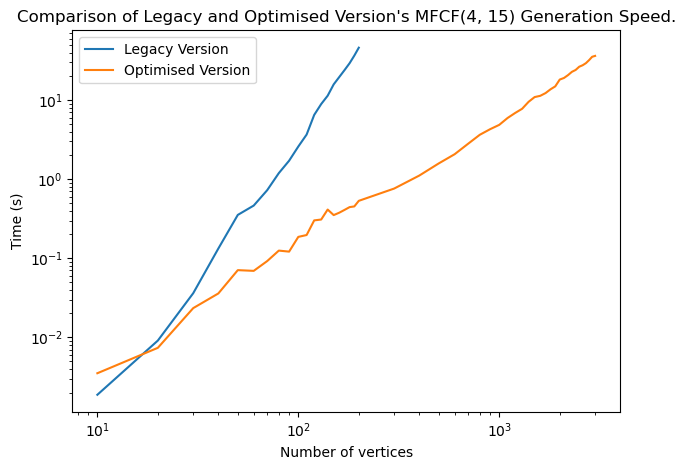

In [35]:
Aplot(result, "Comparison of Legacy and Optimised Version's MFCF(4, 15) Generation Speed.", log=True)